# Mean & robust measures!

In [1]:
import numpy as np
import statsmodels.robust.scale as robust
import scipy.stats as stats
                       
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

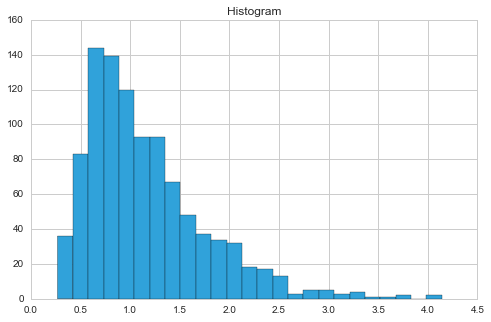

In [2]:
sigma = 0.5
lognormal = stats.lognorm(sigma)

x = lognormal.rvs(1000)

plt.figure(figsize=(8,5))
plt.hist(x, color='#30A2DA', bins=25, alpha=1)
plt.title('Histogram')
plt.savefig('hist.png', dpi=200, bbox_inches='tight')
plt.show()

In [3]:
mean = np.mean(x).round(3)
sd = np.std(x).round(3)
median = np.median(x).round(3)
mad = np.median([abs(i - median) for i in x]).round(3)
tr_mean = stats.trim_mean(x, .20).round(3)
hub = robust.huber(x)[0].round(3)

print('Mean =', mean)
print('Standard deviation =', sd)
print('Median =', median)
print('Median absolute deviation =', mad)
print('Trimmed mean (20%) =', tr_mean)
print('Huber mean =', hub)

Mean = 1.16
Standard deviation = 0.604
Median = 1.016
Median absolute deviation = 0.336
Trimmed mean (20%) = 1.049
Huber mean = 1.099


In [4]:
def plotMean(measure, name):
    plt.figure(figsize=(8,6))
    plt.hist(x, color='#30A2DA', bins=25, alpha=1)
    plt.axvline(mean, color='k', linestyle='-', linewidth=3, label='mean')
    plt.axvline(measure, color='r', linestyle='-', linewidth=3, label=(str(name)))
    plt.legend(loc='upper right')
    plt.title('Mean & robust measure')
    plt.savefig('%s.png' %name, dpi=200, bbox_inches='tight')
    plt.show()

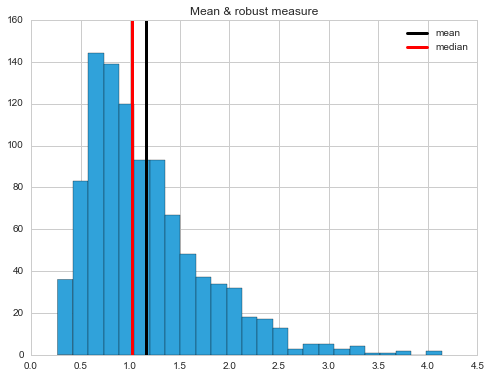

In [5]:
plotMean(median, "median")

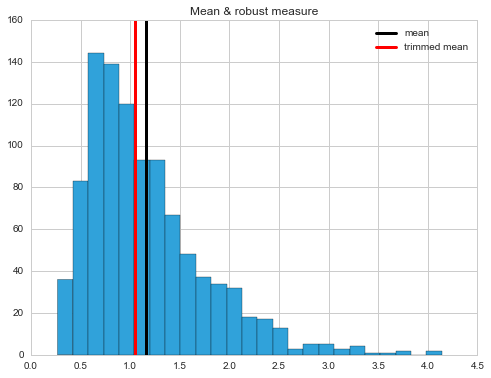

In [6]:
plotMean(tr_mean, "trimmed mean")

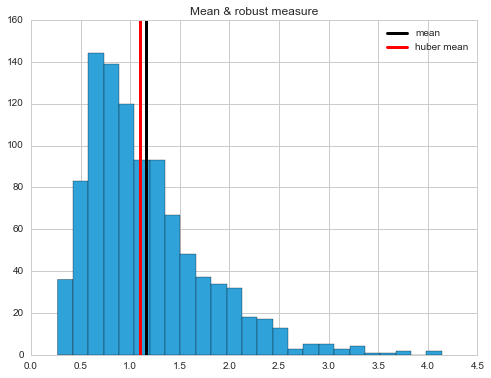

In [7]:
plotMean(hub, "huber mean")

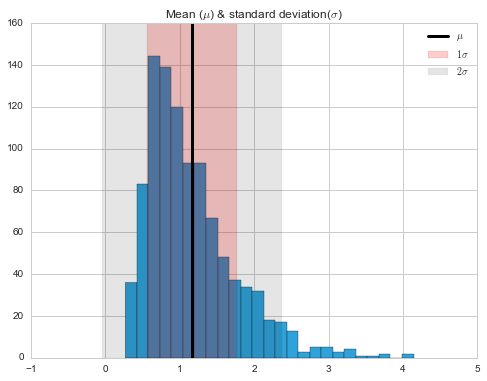

In [8]:
plt.figure(figsize=(8,6))
plt.hist(x, color='#30A2DA', bins=25,  alpha=1)
plt.axvline(mean, color='k', linestyle='-', linewidth=3, label='$\mu$')
plt.axvspan(mean-sd, mean+sd, facecolor='r', alpha=0.2, label=('$1 \sigma$'))
plt.axvspan(mean-2*sd, mean+2*sd, facecolor='k', alpha=0.1, label=('$2 \sigma$'))
plt.legend(loc='upper right')
plt.title('Mean ($\mu$) & standard deviation($\sigma$)')
plt.savefig('mean_sd.png', dpi=200, bbox_inches='tight')
plt.show()

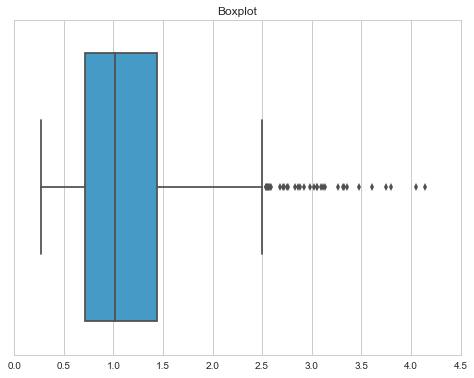

In [9]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.boxplot(x, color='#30A2DA')
plt.title('Boxplot')
plt.savefig('boxplot.png', dpi=200, bbox_inches='tight')
plt.show()

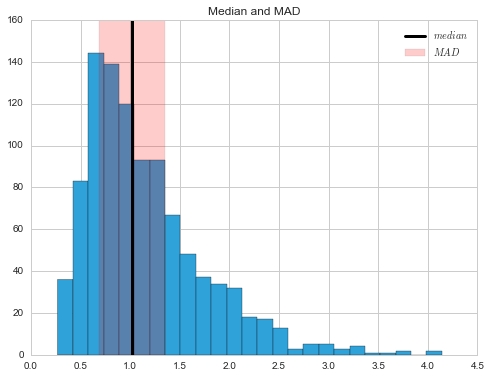

In [10]:
plt.figure(figsize=(8,6))
plt.hist(x, color='#30A2DA', bins=25,  alpha=1)
plt.axvline(median, color='k', linestyle='-', linewidth=3, label='$median$')
plt.axvspan(median-mad, median+mad, facecolor='r', alpha=0.2, label=('$MAD$'))
plt.legend(loc='upper right')
plt.title('Median and MAD')
plt.savefig('median_sd.png', dpi=200, bbox_inches='tight')
plt.show()